# Joseph Matatyaou and Sergio Ramirez
## Week 1 Notebook Basics (Simplicial Complexes and Euler Characteristics)
### 1/8/26


# Simplicial Complexes
The building blocks of constructing complex shapes
*   1 vertex: A point
*   2 veriticies: Segment
*   3 verticies: Triangle


(N+1) verticies are needed to create an simplex of dimension n


Simplex: Smallest possible shape in that dimension
*   0-simpex: point dim =0
*   1-simplex: line segment, dim =1
*   2- simplex: triangle, dim =2
*   3- simplex: tetrahedron, dim =3


0-simplex: ⟨p0⟩  
1-simplex: ⟨p0, p1⟩  
2-simplex: ⟨p0, p1, p2⟩  
3-simplex: ⟨p0, p1, p2, p3⟩

Simplex doesn't have any fixed shape or size
1) We can (rotate,dilate,translate) and it will still count as a simplex
2)We can stretch Simplex
But we can't collapse it into a lower dimension
Simplicial Complex: Represented by K is a collection of simplicies such that
1) If K contains a simplex (), then K also contains every face of ()
2) if two simplices in K intersect, then their intsersection is a face of each
of them


Example:
If K contains simplex 2 in this case <A,B,C> then it must include all its edges
<A,B>,<A,C>,<B,C> and verticies <A>,<B>,<C>





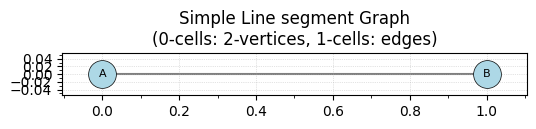

Number of nodes: 2
Number of edges: 1
Dimension of complex: 1


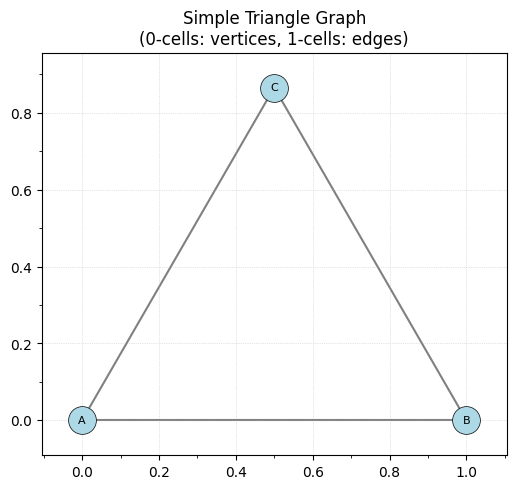

Number of nodes: 3
Number of edges: 3
Embedding dimension: 2


In [4]:
#Simplex
import ect
from ect import EmbeddedComplex
import matplotlib.pyplot as plt

Simplex = {"A","B","C"}
Simplex

#1-Simplex, Line Segment
T1= EmbeddedComplex()
# Veticies
T1.add_node("A", [0,0])
T1.add_node("B", [1,0])
#Edge
T1.add_edge("A","B")
#using built-in plotting function along with matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
T1.plot(ax=ax, with_labels=True, node_size=400)
ax.set_title('Simple Line segment Graph\n(0-cells: 2-vertices, 1-cells: edges)')
plt.show()

#print some information about the complex
print(f"Number of nodes: {len(T1.nodes())}")
print(f"Number of edges: {len(T1.edges())}")
max_dim = max(len(edge)- 1 for edge in T1.edges())
print("Dimension of complex:", max_dim)

K = EmbeddedComplex()

K.add_node('A', [0, 0])
K.add_node('B', [1, 0])
K.add_node('C', [0.5, 0.866])

K.add_edge('A', 'B')
K.add_edge('B', 'C')
K.add_edge('C', 'A')

#using built-in plotting function along with matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
K.plot(ax=ax, with_labels=True, node_size=400)
ax.set_title('Simple Triangle Graph\n(0-cells: vertices, 1-cells: edges)')
plt.show()

#print some information about the complex
print(f"Number of nodes: {len(K.nodes())}")
print(f"Number of edges: {len(K.edges())}")
print(f"Embedding dimension: {K.dim}")

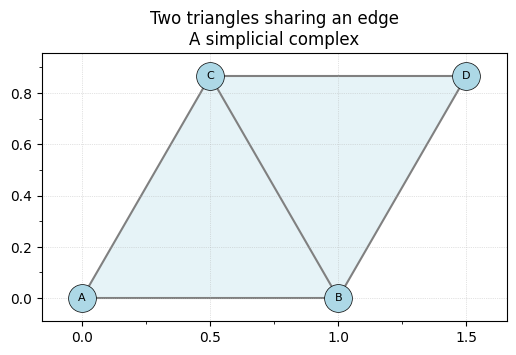

Vertices (0-simplices): 4
Edges (1-simplices): 5
Faces (2-simplices): 2


In [5]:
#Simplicial Complex
# Create the complex
diamond = EmbeddedComplex()

# vertices (0-simplicies)
diamond.add_node("A", [0, 0])
diamond.add_node("B", [1, 0])
diamond.add_node("C", [0.5, 0.866])
diamond.add_node("D", [1.5, 0.866])

# Edges (1-simplices)
diamond.add_edge("A", "B")
diamond.add_edge("B", "C")
diamond.add_edge("C", "A")
diamond.add_edge("B", "D")
diamond.add_edge("C", "D")

# Triangles (2-simplices)
diamond.add_face(["A","B","C"])
diamond.add_face(["B","C","D"])

# Plot the complex
fig, ax = plt.subplots(figsize=(6,6))
diamond.plot(ax=ax, with_labels=True, node_size=400)
ax.set_title("Two triangles sharing an edge\nA simplicial complex")
plt.show()

# Print info
V = len(diamond.nodes())
E = len(diamond.edges())
F = len(diamond.faces)
print("Vertices (0-simplices):", V)
print("Edges (1-simplices):", E)
print("Faces (2-simplices):", F)

# Euler Characteristics

The Euler Characteristic of a space is defined as the alternating sum of the simplicies in each dimension

$$\chi = \sum_{k=0}^{n} (-1)^k \, c_k$$

Where $c_k$ represents the number of k dimensional simplexes. This number is a topological invariant, meaning it does not change under continuous deformations of the space, and it captures global features like connectivity and the presence of holes. Two spaces or shapes with the same Euler Characteristics are homotopic, meaning one can be continuosly deformed into the other.

In the specific case of 2 or 3 dimensions the Euler Characteristic can be defined as $\chi = V - E + F = 2$. Meaning that all 2-dimensional shapes are homotopic to the circle and 3-dimensional shpaes are homotopic to the sphere.

# The Euler Characteristic Transform (ECT)

The ECT is a way to describe the shape of an object using multiple Euler characteristics. The base idea taking place when one takes a shape and chooses a direction and slides a "cutting" plane through the shape in that direction. At each position, you look at the part of the shape you've passed through and compute the Euler Characteristic. You then record how the number changes as you slide on the plane. After repeating this process for many directions the collection of all of the resulting curves in the ECT.

The ECT is useful since in can summarize complex shapes, its robust to noise and deformations, and can generally can encode shape information.



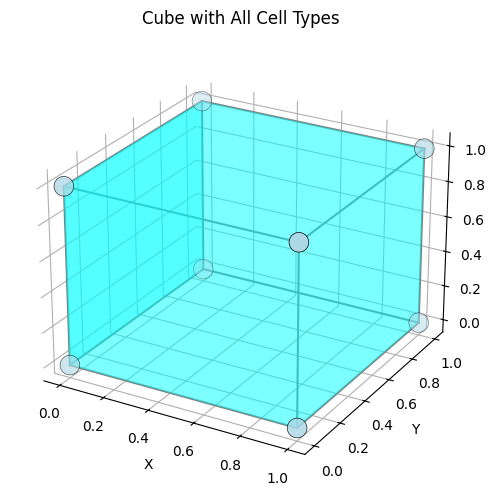

Dimension 2: 7 cells
Dimension 3: 1 cells

Total embedding dimension: 3


In [6]:
#Cube
import numpy as np
import matplotlib.pyplot as plt
from ect import EmbeddedComplex, ECT, Directions
from ect.utils.examples import create_example_graph, create_example_cw, create_example_3d_complex

K_cube = EmbeddedComplex()
vertices = {
    'A': [0, 0, 0],
    'B': [1, 0, 0],
    'C': [1, 1, 0],
    'D': [0, 1, 0],
    'E': [0, 0, 1],
    'F': [1, 0, 1],
    'G': [1, 1, 1],
    'H': [0, 1, 1]
    }

for name, coord in vertices.items():
    K_cube.add_node(name, coord)

#add edges
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('A', 'E'),('B', 'F'), ('C', 'G'), ('D', 'H'), ('E','F'), ('E', 'H'), ('G', 'F'), ('G', 'H') ]
K_cube.add_edges_from(edges)

#add faces
faces = [('A', 'B', 'C', 'D'), ('E', 'F', 'G', 'H'), ('A', 'B', 'F', 'E'), ('B', 'C', 'G', 'F'), ('C', 'D', 'H', 'G'), ('D', 'A', 'E', 'H')]
for face in faces:
  K_cube.add_cell(face, dim=2)

K_cube.add_cell(face,dim=2)

#add volume
K_cube.add_cell(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dim=3)

#Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
K_cube.plot(ax=ax, face_alpha=.3, face_color = 'cyan', node_size=200)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cube with All Cell Types')
plt.show()

#Display cell counts

for dim in sorted(K_cube.cells.keys()):
  print(f"Dimension {dim}: {len(K_cube.cells[dim])} cells")
print(f"\nTotal embedding dimension: {K_cube.dim}")



ECT result shape: (8, 20)
Directions: 8 directions in 3D
Thresholds: 20 threshold values


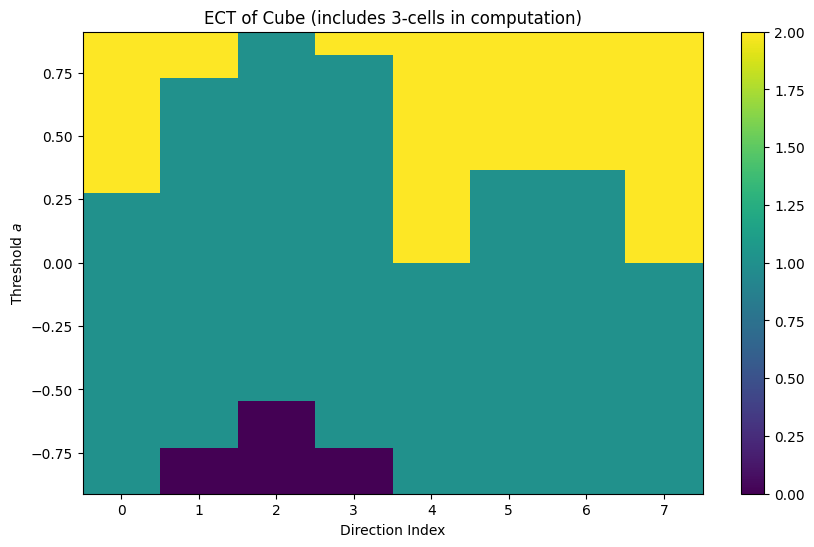

In [7]:
#Compute the ECT for the Cube
from ect import EmbeddedComplex, ECT, Directions
ect=ECT(num_dirs=8, num_thresh=20)
result=ect.calculate(K_cube)

print(f"ECT result shape: {result.shape}")
print(f"Directions: {len(result.directions)} directions in {K_cube.dim}D")
print(f"Thresholds: {len(result.thresholds)} threshold values")

#Plot ECT Matrix
fig, ax = plt.subplots(figsize=(10,6))
result.plot()
plt.title('ECT of Cube (includes 3-cells in computation)')
plt.show()

single_direction = ECT(num_thresh=20, directions=Directions.from_vectors([[1,0,0]])).calculate(K_cube)
ax.plot(single_direction.thresholds, single_direction[0], 'b-', marker= 'o', linewidth = 2)
ax.set_xlabel('Threshold')
ax.set_ylabel('Euler Characteristic')
ax.set_title('ECT for a single direction (v=[1,0,0])')
ax.grid(True, alpha =0.3)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

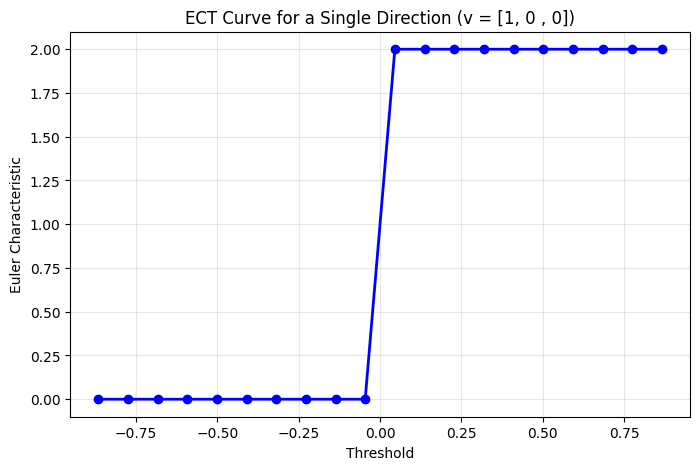

In [8]:
from ect import ECT
single_direction = ECT(num_thresh=20, directions=Directions.from_vectors([[1,0,0]])).calculate(K_cube)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(single_direction.thresholds, single_direction[0], 'b-', marker = 'o', linewidth = 2)
ax.set_xlabel('Threshold')
ax.set_ylabel('Euler Characteristic')
ax.set_title('ECT Curve for a Single Direction (v = [1, 0 , 0])')
ax.grid(True, alpha=0.3)
plt.show